In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

movies = pd.read_csv("../data/data1/movies.csv")  
ratings = pd.read_csv("../data/data1/ratings.csv")

In [ ]:
print(movies.head())
print(ratings.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [ ]:
print(movies.columns)
print(ratings.columns)

Index(['movieId', 'title', 'genres'], dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


In [ ]:
ratings_sample = ratings.sample(100000, random_state=42)  # 100 mil linhas

In [ ]:
print("Movies columns:", movies.columns)
print("Ratings columns:", ratings_sample.columns)

Movies columns: Index(['movieId', 'title', 'genres'], dtype='object')
Ratings columns: Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


In [ ]:
print(movies.head())
print(ratings_sample.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
       userId  movieId  rating   timestamp
67037     432    77866     4.5  1335139641
42175     288      474     3.0   978465565
93850     599     4351     3.0  1498524542
6187       42     2987     4.0   996262677
12229      75     1610     4.0  1158989841


In [ ]:
movies.info()
ratings_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 67037 to 36187
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100000 non-null  int64  
 1   movieId    100000 non-null  int64  
 2   rating     100000 non-null  float64
 3   timestamp  100000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.8 MB


In [ ]:
ratings_sample.describe()  # média, min, max, desvio padrão das notas

,userId,movieId,rating,timestamp
count,100000.00000,100000.00000,100000.000000,1.000000e+05
mean,326.13569,19427.16145,3.501655,1.205907e+09
std,182.60425,35520.45765,1.042634,2.162554e+08
min,1.00000,1.00000,0.500000,8.281246e+08
25%,177.00000,1199.00000,3.000000,1.019124e+09
50%,325.00000,2991.00000,3.500000,1.186087e+09
75%,477.00000,8126.50000,4.000000,1.435994e+09
max,610.00000,193609.00000,5.000000,1.537799e+09


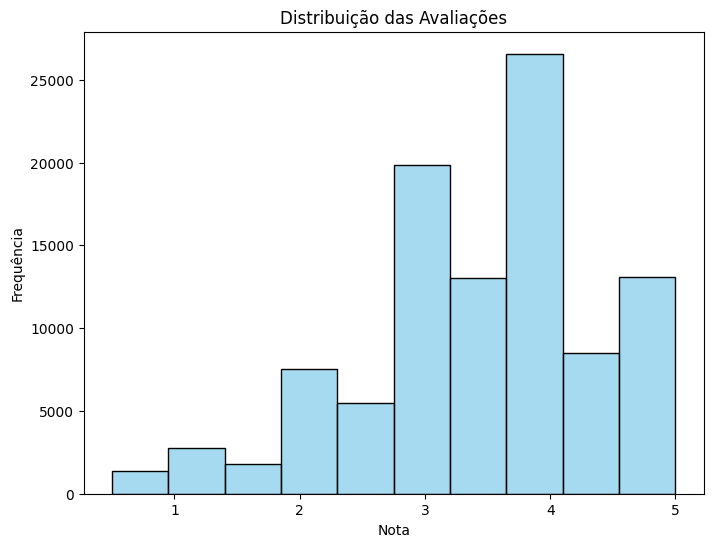

In [ ]:
# Histograma das avaliações
plt.figure(figsize=(8,6))
sns.histplot(ratings_sample['rating'], bins=10, kde=False, color='skyblue')
plt.title("Distribuição das Avaliações")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.show()

In [ ]:
# Agrupar e contar avaliações por filme
ratings_count = ratings_sample.groupby('movieId')['rating'].count().sort_values(ascending=False)

# Juntar com os títulos dos filmes
ratings_with_titles = pd.merge(
    ratings_count.head(20).reset_index(),
    movies[['movieId', 'title']],
    on='movieId'
)

C:\Users\laris\AppData\Local\Temp\ipykernel_14932\287216113.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


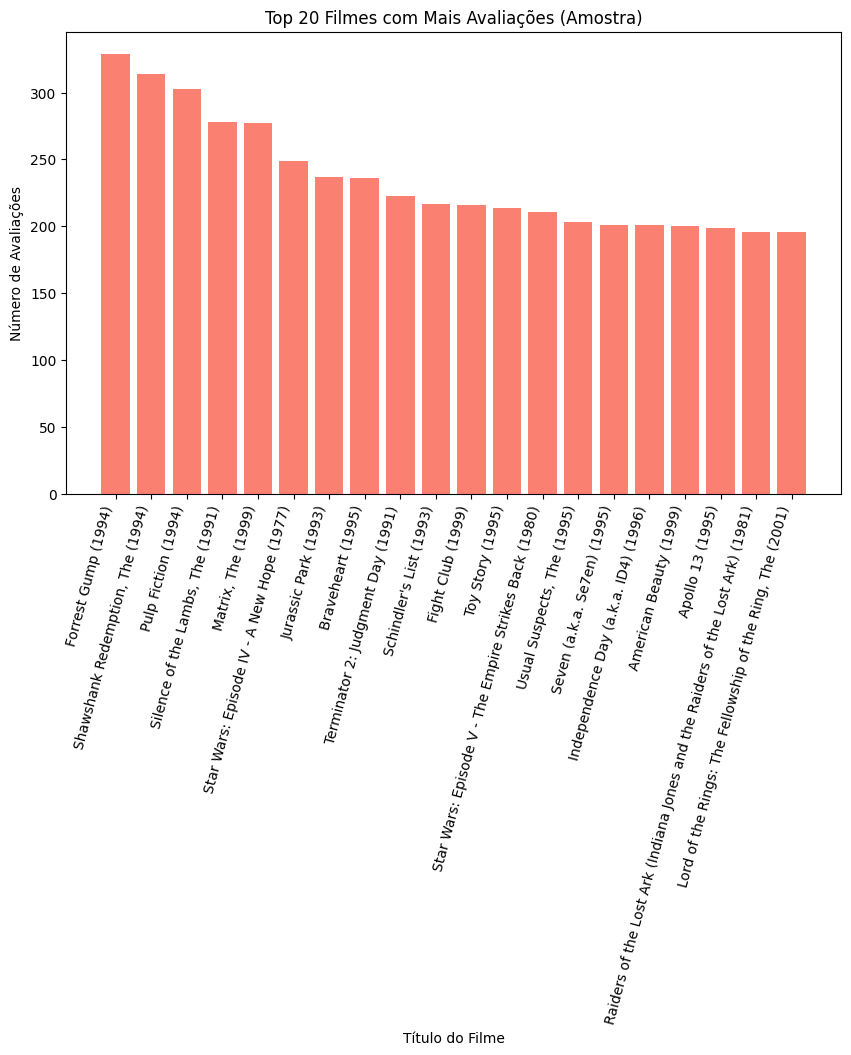

In [ ]:
# Plotar usando os títulos
plt.figure(figsize=(10,6))
plt.bar(ratings_with_titles['title'], ratings_with_titles['rating'], color='salmon')
plt.title("Top 20 Filmes com Mais Avaliações (Amostra)")
plt.xlabel("Título do Filme")
plt.ylabel("Número de Avaliações")
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

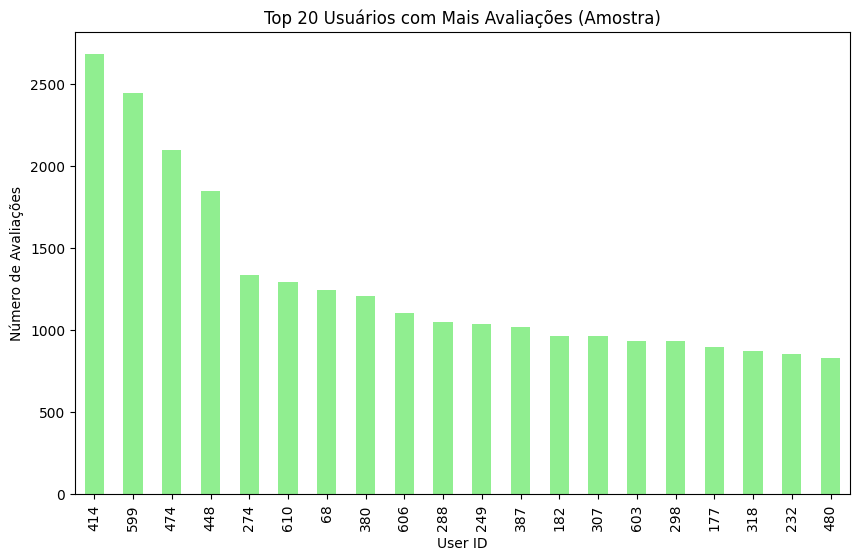

In [ ]:
# Agrupar e contar avaliações por usuário
user_count = ratings_sample.groupby('userId')['rating'].count().sort_values(ascending=False)

plt.figure(figsize=(10,6))
user_count.head(20).plot(kind='bar', color='lightgreen')
plt.title("Top 20 Usuários com Mais Avaliações (Amostra)")
plt.xlabel("User ID")
plt.ylabel("Número de Avaliações")
plt.show()

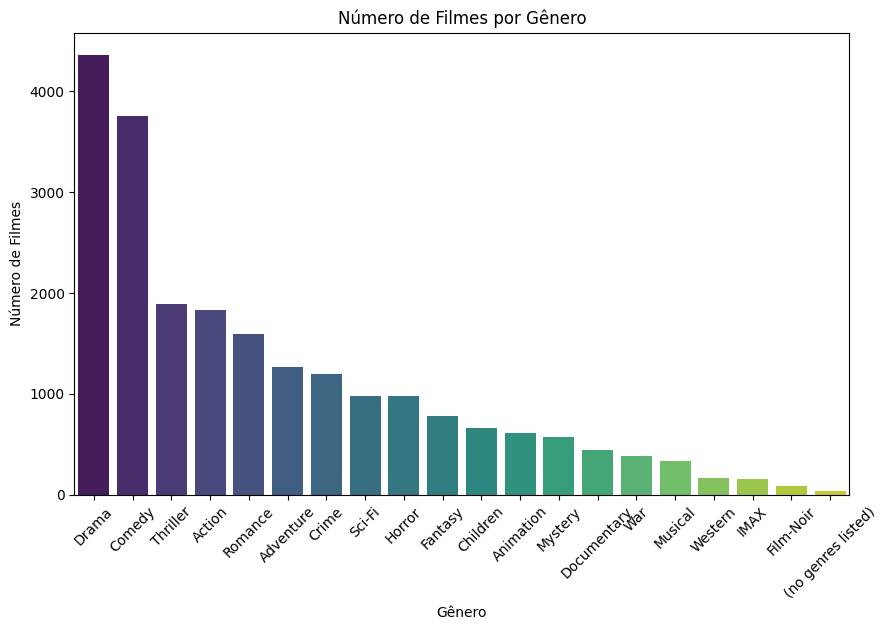

In [ ]:
# Criar lista de todos os gêneros
all_genres = movies['genres'].str.split('|').explode()
genre_counts = all_genres.value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, hue=genre_counts.index, palette='viridis', legend=False)
plt.title("Número de Filmes por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Número de Filmes")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Ver quantidade de valores faltantes por coluna
print("movies.csv:")
print(movies.isna().sum())

print("\nratings.csv:")
print(ratings.isna().sum())

movies.csv:
movieId    0
title      0
genres     0
dtype: int64

ratings.csv:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
